# Домашнее задание 

In [76]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.shape

(48842, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Проверим значения категориальных переменных:

In [6]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [8]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [9]:
data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [10]:
data['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [11]:
data['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [12]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
data['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [14]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

Как видно, три категориальные переменные имеют пустые значения (в данном случае они заполнены вопросительным знаком "?"). Это workclass, occupation, native-country. Заполним пропуски средним значением по столбцу.

In [15]:
attr, counts = np.unique(data['workclass'], return_counts = True)
data['workclass'][data['workclass'] == '?'] = attr[np.argmax(counts, axis=0)]

In [16]:
attr, counts = np.unique(data['occupation'], return_counts = True)
data['occupation'][data['occupation'] == '?'] = attr[np.argmax(counts, axis=0)]

In [17]:
attr, counts = np.unique(data['native-country'], return_counts = True)
data['native-country'][data['native-country'] == '?'] = attr[np.argmax(counts, axis=0)]

Проверим теперь значения этих категорий:

In [18]:
data['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [19]:
data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Prof-specialty', 'Other-service', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [20]:
data['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

Разделим данные для обучения и таргет-значения

In [21]:
X = data.drop('income', axis = 1)
y = data['income']

Переведем категорильные признаки в значения 0 и 1

In [22]:
categorial_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                        'relationship', 'race', 'gender', 'native-country']
X = pd.get_dummies(X, columns=categorial_columns)

In [23]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Так же переведем таргет-переменную и заодно посмотрим распределение значений.

In [24]:
y.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [25]:
y = y.map({'<=50K': 0, '>50K': 1})

In [26]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

Разделим выборки на трейн и тест

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [28]:
X_train.shape, X_test.shape

((34189, 105), (14653, 105))

## Значения AUC для различных значений параметров LogisticRegression

In [30]:
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

In [33]:
params = []
auc = []
curves = []

for p in penalty:
    for c in C:
        lr = LogisticRegression(random_state=17, penalty=p, C=c)
        lr.fit(X_train, y_train)
        
        probas = lr.predict_proba(X_test)[:, 1]
        params.append((p, c))
        auc.append(roc_auc_score(y_test, probas))
        curves.append(roc_curve(y_test, probas))

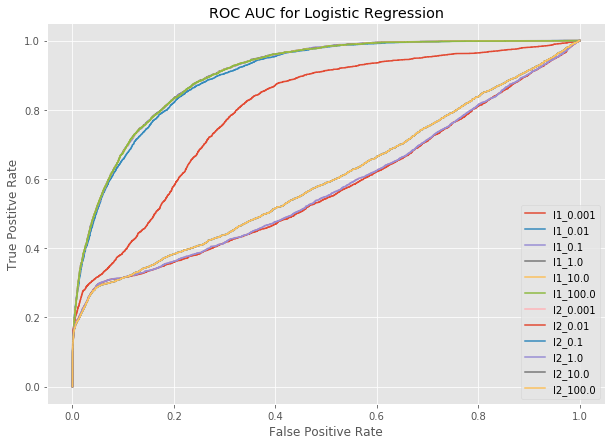

In [73]:
plt.figure(figsize=(10, 7))

for i in range(len(params)):
    plt.plot(curves[i][0], curves[i][1], label='{}_{}'.format(params[i][0], params[i][1]))

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitve Rate')
plt.title('ROC AUC for Logistic Regression')
plt.show()

In [75]:
for i in range(len(params)):
    print('{}_{}: {}'.format(params[i][0], params[i][1], auc[i]))

l1_0.001: 0.7976406921820758
l1_0.01: 0.8980849913447884
l1_0.1: 0.9031929447197338
l1_1.0: 0.9035013719933638
l1_10.0: 0.9029947976829917
l1_100.0: 0.902819727806932
l2_0.001: 0.5777064671955863
l2_0.01: 0.5747141712401906
l2_0.1: 0.6007694854584531
l2_1.0: 0.5776715195927391
l2_10.0: 0.6007644820032609
l2_100.0: 0.6007637672239479


## Значения AUC для различных значений параметров DecisionTreeClassifier

In [81]:
max_depth = [7, 10, 15]
min_samples_leaf = [10, 20]
max_features = [50, 70, 90]

In [83]:
params = []
auc = []
curves = []

for depth in max_depth:
    for samples in min_samples_leaf:
        for feature in max_features:
            tree = DecisionTreeClassifier(random_state=17, 
                                          max_depth=depth, 
                                          min_samples_leaf=samples, 
                                          max_features=feature)
            tree.fit(X_train, y_train)

            probas = tree.predict_proba(X_test)[:, 1]
            params.append((depth, samples, feature))
            auc.append(roc_auc_score(y_test, probas))
            curves.append(roc_curve(y_test, probas))

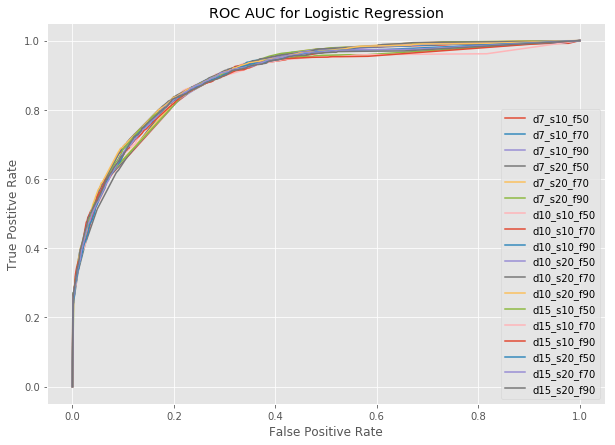

In [85]:
plt.figure(figsize=(10, 7))

for i in range(len(params)):
    plt.plot(curves[i][0], curves[i][1], label='d{}_s{}_f{}'.format(params[i][0], params[i][1], params[i][2]))

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitve Rate')
plt.title('ROC AUC for Logistic Regression')
plt.show()

In [86]:
for i in range(len(params)):
    print('d{}_s{}_f{}: {}'.format(params[i][0], params[i][1], params[i][2], auc[i]))

d7_s10_f50: 0.8942328541674057
d7_s10_f70: 0.8967829442423633
d7_s10_f90: 0.8969389320635448
d7_s20_f50: 0.8957745948541506
d7_s20_f70: 0.8977638129187682
d7_s20_f90: 0.8987798206567648
d10_s10_f50: 0.9003505864891904
d10_s10_f70: 0.8986391495351509
d10_s10_f90: 0.8994972676284363
d10_s20_f50: 0.8998457353075199
d10_s20_f70: 0.903509336677139
d10_s20_f90: 0.9017198866666344
d15_s10_f50: 0.890953484970361
d15_s10_f70: 0.8826884790083356
d15_s10_f90: 0.8868818211964232
d15_s20_f50: 0.8935519247602873
d15_s20_f70: 0.8941527095369174
d15_s20_f90: 0.8928201822023525
